# Forecasting  Stock Price 

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

### importing the data

In [2]:
df= pd.read_csv("SBI_Historical_Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


### EDA

In [3]:
df.shape

(1385, 7)

In [4]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

### Converting Date 

In [5]:
# convert object to data_time 
df["Date"]=pd.to_datetime(df["Date"])

In [6]:
df["Date"].min(),df["Date"].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

### Checking Data Types and Missing  Values

In [7]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [8]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


### single_Dimensional data 

In [9]:
orignal_data = df.copy()
df=df[["Date","Price"]]
df.shape

(1385, 2)

###  sort the data in a chronological order 

In [10]:
df= df.sort_values("Date", ascending=True )

In [11]:
df.tail(20)

,Date,Price
19,2020-07-13,192.70
18,2020-07-14,186.05
17,2020-07-15,183.80
16,2020-07-16,186.25
15,2020-07-17,188.20
14,2020-07-20,190.75
13,2020-07-21,194.40
12,2020-07-22,192.00
11,2020-07-23,198.25
10,2020-07-24,191.95


In [12]:
pd.set_option('display.max_rows', None)
df["Date"].value_counts()

2015-01-01    1
2018-09-18    1
2018-10-01    1
2018-09-28    1
2018-09-27    1
2018-09-26    1
2018-09-25    1
2018-09-24    1
2018-09-21    1
2018-09-19    1
2018-09-17    1
2018-10-04    1
2018-09-14    1
2018-09-12    1
2018-09-11    1
2018-09-10    1
2018-09-07    1
2018-09-06    1
2018-09-05    1
2018-09-04    1
2018-10-03    1
2018-10-05    1
2018-11-06    1
2018-10-23    1
2018-11-02    1
2018-11-01    1
2018-10-31    1
2018-10-30    1
2018-10-29    1
2018-10-26    1
2018-10-25    1
2018-10-24    1
2018-10-22    1
2018-10-08    1
2018-10-19    1
2018-10-17    1
2018-10-16    1
2018-10-15    1
2018-10-12    1
2018-10-11    1
2018-10-10    1
2018-10-09    1
2018-09-03    1
2018-08-31    1
2018-08-30    1
2018-07-16    1
2018-07-26    1
2018-07-25    1
2018-07-24    1
2018-07-23    1
2018-07-20    1
2018-07-19    1
2018-07-18    1
2018-07-17    1
2018-07-13    1
2018-08-29    1
2018-07-12    1
2018-07-11    1
2018-07-10    1
2018-07-09    1
2018-07-06    1
2018-07-05    1
2018-07-

In [13]:
# No need of groupBy

### Convert the data time to index 

In [14]:
df=df.set_index("Date")

In [15]:
df.head()

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15


### Checking Missing values 

In [16]:
df.isnull().sum()

Price    0
dtype: int64

### EQually Spaced time Interval with Monthly base 

In [17]:
Y= df["Price"].resample("W").mean()

In [18]:
Y.head(20)

Date
2015-01-04    314.625000
2015-01-11    304.170000
2015-01-18    310.530000
2015-01-25    321.920000
2015-02-01    325.150000
2015-02-08    296.390000
2015-02-15    288.800000
2015-02-22    304.262500
2015-03-01    296.550000
2015-03-08    298.062500
2015-03-15    286.200000
2015-03-22    282.380000
2015-03-29    266.190000
2015-04-05    269.466667
2015-04-12    277.440000
2015-04-19    290.112500
2015-04-26    282.780000
2015-05-03    270.300000
2015-05-10    267.500000
2015-05-17    277.230000
Freq: W-SUN, Name: Price, dtype: float64

In [19]:
Y.shape

(293,)

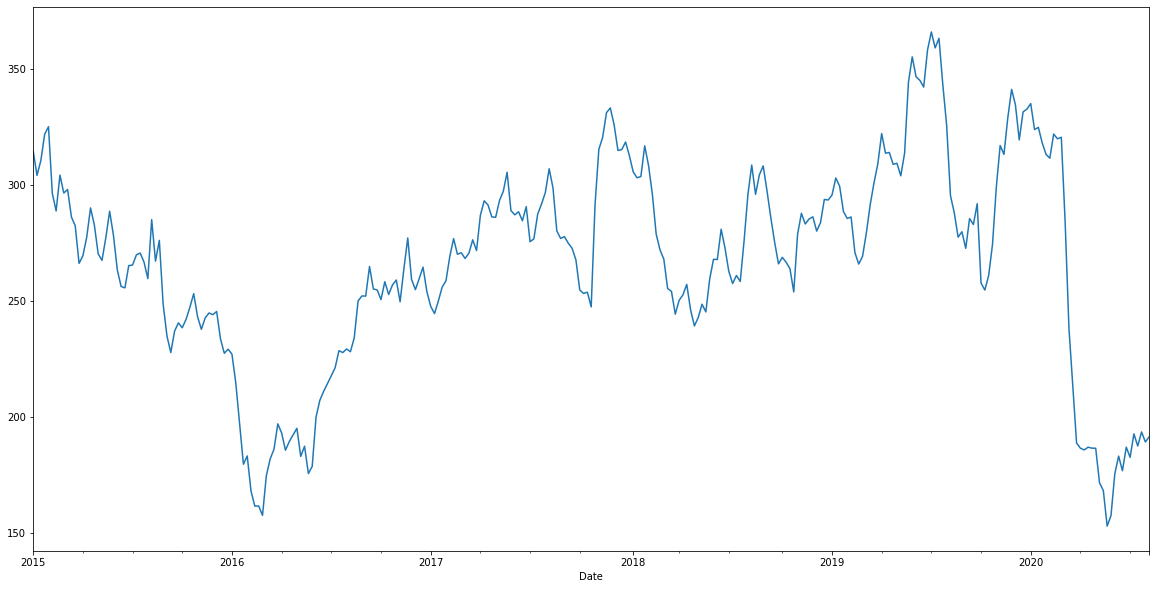

In [20]:
Y.plot(figsize=(20,10))
plt.show()

### createing train and test 

In [21]:
Y

Date
2015-01-04    314.625000
2015-01-11    304.170000
2015-01-18    310.530000
2015-01-25    321.920000
2015-02-01    325.150000
2015-02-08    296.390000
2015-02-15    288.800000
2015-02-22    304.262500
2015-03-01    296.550000
2015-03-08    298.062500
2015-03-15    286.200000
2015-03-22    282.380000
2015-03-29    266.190000
2015-04-05    269.466667
2015-04-12    277.440000
2015-04-19    290.112500
2015-04-26    282.780000
2015-05-03    270.300000
2015-05-10    267.500000
2015-05-17    277.230000
2015-05-24    288.700000
2015-05-31    278.260000
2015-06-07    263.450000
2015-06-14    256.220000
2015-06-21    255.640000
2015-06-28    265.220000
2015-07-05    265.480000
2015-07-12    269.870000
2015-07-19    270.650000
2015-07-26    266.720000
2015-08-02    259.620000
2015-08-09    285.080000
2015-08-16    267.140000
2015-08-23    276.120000
2015-08-30    248.570000
2015-09-06    234.880000
2015-09-13    227.730000
2015-09-20    237.012500
2015-09-27    240.525000
2015-10-04    238.41

In [22]:
train=Y.loc[:"2018-12-30"]
train.shape

(209,)

In [23]:
train

Date
2015-01-04    314.625000
2015-01-11    304.170000
2015-01-18    310.530000
2015-01-25    321.920000
2015-02-01    325.150000
2015-02-08    296.390000
2015-02-15    288.800000
2015-02-22    304.262500
2015-03-01    296.550000
2015-03-08    298.062500
2015-03-15    286.200000
2015-03-22    282.380000
2015-03-29    266.190000
2015-04-05    269.466667
2015-04-12    277.440000
2015-04-19    290.112500
2015-04-26    282.780000
2015-05-03    270.300000
2015-05-10    267.500000
2015-05-17    277.230000
2015-05-24    288.700000
2015-05-31    278.260000
2015-06-07    263.450000
2015-06-14    256.220000
2015-06-21    255.640000
2015-06-28    265.220000
2015-07-05    265.480000
2015-07-12    269.870000
2015-07-19    270.650000
2015-07-26    266.720000
2015-08-02    259.620000
2015-08-09    285.080000
2015-08-16    267.140000
2015-08-23    276.120000
2015-08-30    248.570000
2015-09-06    234.880000
2015-09-13    227.730000
2015-09-20    237.012500
2015-09-27    240.525000
2015-10-04    238.41

In [24]:
test=Y.loc["2019-01-06":]
test.shape

(84,)

In [25]:
test

Date
2019-01-06    295.630000
2019-01-13    303.040000
2019-01-20    299.510000
2019-01-27    288.560000
2019-02-03    285.540000
2019-02-10    286.210000
2019-02-17    270.830000
2019-02-24    265.900000
2019-03-03    269.230000
2019-03-10    279.375000
2019-03-17    291.540000
2019-03-24    300.962500
2019-03-31    309.210000
2019-04-07    322.220000
2019-04-14    313.720000
2019-04-21    314.050000
2019-04-28    308.950000
2019-05-05    309.366667
2019-05-12    303.960000
2019-05-19    313.730000
2019-05-26    344.180000
2019-06-02    355.290000
2019-06-09    346.700000
2019-06-16    345.140000
2019-06-23    342.260000
2019-06-30    358.260000
2019-07-07    366.050000
2019-07-14    359.160000
2019-07-21    363.290000
2019-07-28    343.310000
2019-08-04    325.830000
2019-08-11    295.450000
2019-08-18    288.000000
2019-08-25    277.520000
2019-09-01    279.830000
2019-09-08    272.687500
2019-09-15    285.500000
2019-09-22    282.960000
2019-09-29    291.930000
2019-10-06    257.71

### Plotting the data

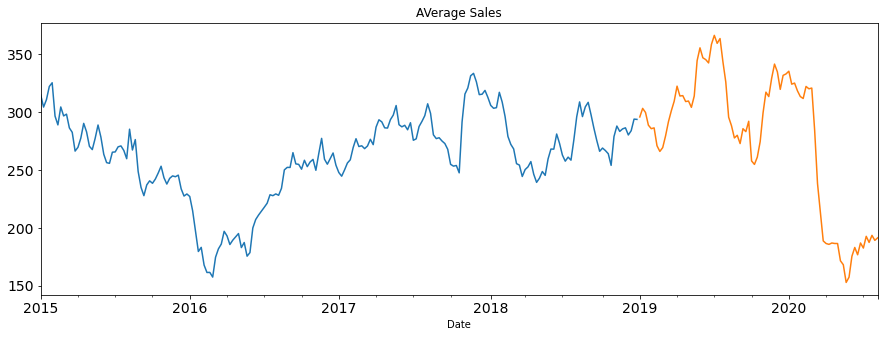

In [26]:
train.plot(figsize=(15,5),title="AVerage Sales",fontsize=14)
test.plot(figsize=(15,5),title="AVerage Sales",fontsize=14)
plt.show()

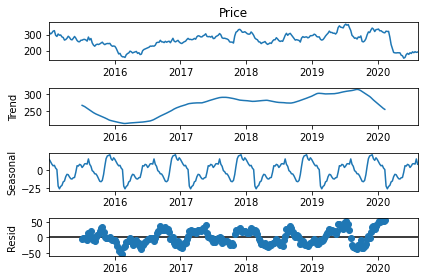

In [27]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(Y)
fig=decomposition.plot()
plt.show()

# Triple  Expoential Smoothing 

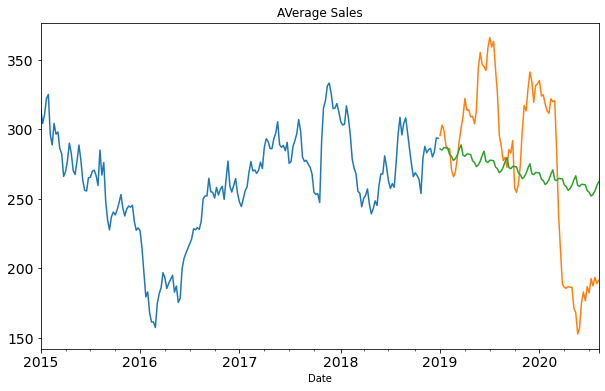

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing 
Holt_Winter_df = test.copy()
#seasonalperiods = gamma 
fit1 =  ExponentialSmoothing(train,seasonal_periods=12,trend="mul",seasonal="mul").fit()
Holt_Winter_df["Holt_winter"] = fit1.forecast(steps=len(test))


train.plot(figsize=(20,5),title="AVerage Sales",fontsize=14)
test.plot(figsize=(20,5),title="AVerage Sales",fontsize=14)
Holt_Winter_df["Holt_winter"].plot(figsize=(10,6),title="AVerage Sales",fontsize=14 )
plt.show()


In [29]:
fit1.aic

960.8329528231056

In [30]:
# RMSE is used to compare different models with same data but different Algos
# Choose the model with Lowest RMSE value 

from sklearn.metrics import  mean_squared_error
from math import sqrt 
rmse =sqrt(mean_squared_error(test,Holt_Winter_df["Holt_winter"]))
print(rmse)

55.23566377509189


In [31]:
Holt_Winter_df["Holt_winter"].head(20)

2019-01-06    285.945837
2019-01-13    285.124477
2019-01-20    286.894893
2019-01-27    286.718136
2019-02-03    286.486088
2019-02-10    281.841103
2019-02-17    280.585547
2019-02-24    277.600065
2019-03-03    278.880778
2019-03-10    281.517773
2019-03-17    285.705338
2019-03-24    288.853090
2019-03-31    281.382578
2019-04-07    280.574326
2019-04-14    282.316489
2019-04-21    282.142552
2019-04-28    281.914208
2019-05-05    277.343349
2019-05-12    276.107830
2019-05-19    273.169992
Freq: W-SUN, dtype: float64

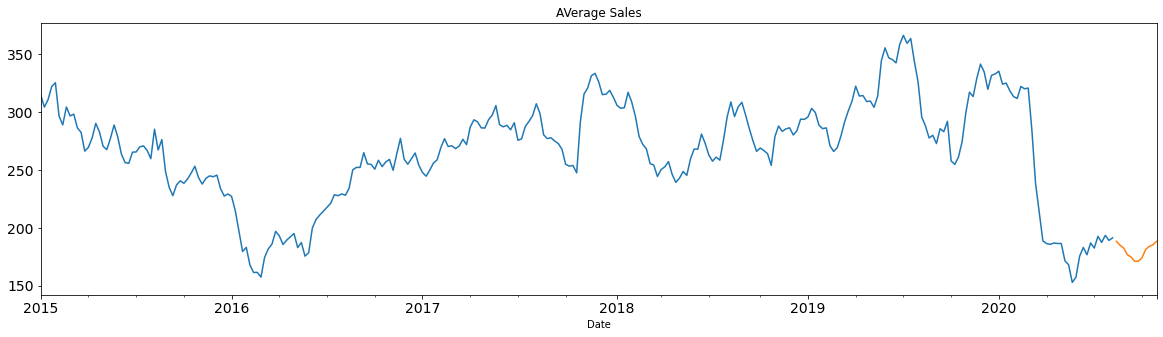

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing 
Holt_Winter_df = test.copy()
#seasonalperiods = gamma 
fit1 =  ExponentialSmoothing(Y,seasonal_periods=24,trend="add",seasonal="add").fit()
Y_predictions = fit1.forecast(steps=12)


Y.plot(figsize=(20,5),title="AVerage Sales",fontsize=14)
Y_predictions.plot(figsize=(20,5),title="AVerage Sales",fontsize=14)
plt.show()

In [33]:
Y_predictions

2020-08-16    188.416929
2020-08-23    185.056696
2020-08-30    182.556427
2020-09-06    176.771666
2020-09-13    174.826521
2020-09-20    171.057971
2020-09-27    171.163947
2020-10-04    174.131556
2020-10-11    181.405741
2020-10-18    184.058435
2020-10-25    185.358952
2020-11-01    188.387320
Freq: W-SUN, dtype: float64

In [34]:
Y_predictions.to_excel("stock_price_SBI.xlsx",header=["PRICE"],index=True)

# BY ARIMA MODEL 

In [35]:
import pmdarima as pm 

## Test for stationarity

In [36]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Y)


(0.4195085480129255, True)

### p-value is greater then 0.05 that mean time series isn't stationary


#### From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.



In [37]:
model = pm.auto_arima(Y,start_p=0, max_p=3, d=1, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=1, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,error_action='warn',stepwise = True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2330.477, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2222.574, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2305.673, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2196.090, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2190.529, Time=0.49 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=2204.341, Time=0.39 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=2192.429, Time=0.61 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=2192.460, Time=0.74 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=2192.242, Time=0.47 sec
 ARIMA(2,1,1)(3,1,0)[12]             : AIC=2189.345, Time=1.33 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=2195.075, Time=0.65 sec
 ARIMA(2,1,1)(3,1,1)[12]          

In [38]:
model.aic()

2187.108525854708

In [39]:
#Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  293
Model:             SARIMAX(1, 1, 2)x(3, 1, [], 12)   Log Likelihood               -1086.554
Date:                             Thu, 29 Sep 2022   AIC                           2187.109
Time:                                     21:29:13   BIC                           2212.552
Sample:                                 01-04-2015   HQIC                          2197.314
                                      - 08-09-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9125      0.087    -10.484      0.000      -1.083      -0.742
ma.L1          1.1756      0.100     11.724      0.000       0.979       1.372
ma.L2          0.3063      0.057      5.409      0.000       0.195       0.417
ar.S.L12      -0.7971      0.063    -12.683      0.000      -0.920      -0.674
ar.S.L24      -0.4876      0.073     -6.721      0.000      -0.630      -0.345
ar.S.L36      -0.1846      0.066     -2.786      0.005      -0.314      -0.055
sigma2       133.4048      8.932     14.936      0.000     115.899     150.911
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.62
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Estimation-build the model using the optimum values

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(Y,order=(1,1,2),seasonal_order=(3,1,0,12)).fit()

# Validation-interpret how good is the model by validation test in

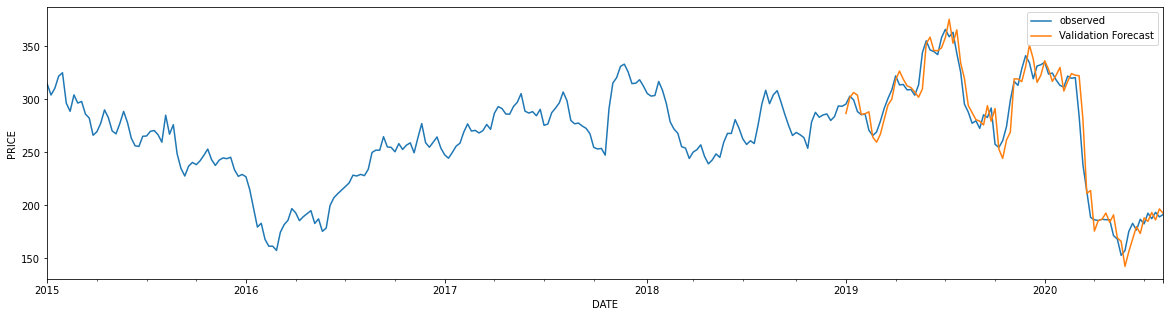

In [41]:
pred =  model.get_prediction(start=pd.to_datetime("2019-01-06"))
# pred- model.get_forecast(steps=12)
plt.figure(figsize=(20,5))
ax=Y['2015':].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="Validation Forecast")
ax.set_xlabel("DATE")
ax.set_ylabel("PRICE")
plt.legend()
plt.show()

In [42]:
pred.predicted_mean

Date
2019-01-06    286.761322
2019-01-13    301.748077
2019-01-20    306.554628
2019-01-27    304.037276
2019-02-03    285.829093
2019-02-10    286.479755
2019-02-17    288.323904
2019-02-24    264.475042
2019-03-03    259.617368
2019-03-10    267.134271
2019-03-17    281.137326
2019-03-24    294.805057
2019-03-31    300.340229
2019-04-07    318.518679
2019-04-14    326.746276
2019-04-21    319.019681
2019-04-28    312.855287
2019-05-05    311.209843
2019-05-12    306.915514
2019-05-19    302.106444
2019-05-26    309.905735
2019-06-02    352.682841
2019-06-09    358.775735
2019-06-16    346.088258
2019-06-23    345.979823
2019-06-30    348.651018
2019-07-07    358.328090
2019-07-14    375.541217
2019-07-21    352.997336
2019-07-28    365.626198
2019-08-04    334.378948
2019-08-11    319.552497
2019-08-18    294.275613
2019-08-25    287.509302
2019-09-01    280.911331
2019-09-08    279.479427
2019-09-15    275.872364
2019-09-22    294.073372
2019-09-29    279.413884
2019-10-06    291.39

In [43]:
Y_pred = pred.predicted_mean
Y_test = Y["2019-01-06":]

from sklearn.metrics import mean_squared_error
from math import  sqrt
rmse= sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

13.431117012968226


# Forescating 

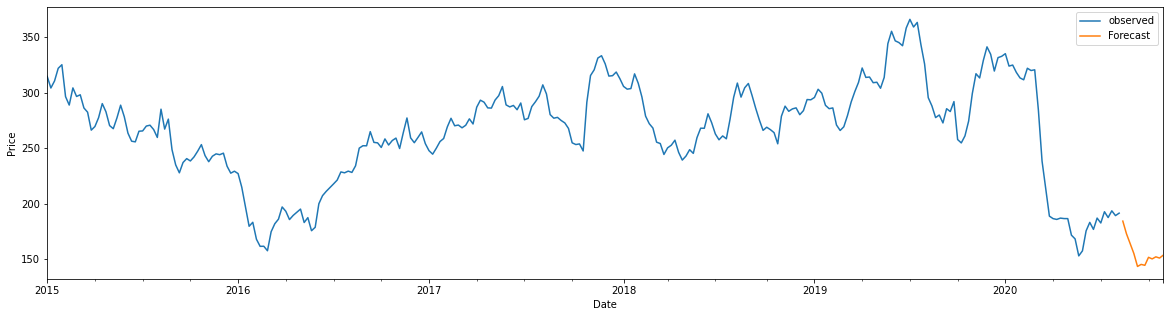

In [44]:

pred=model.get_forecast(steps=12)
plt.figure(figsize=(20,5))
ax=Y['2015':].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.legend()
plt.show()